In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Three Functions for 3 Main Visualizations
Make sure to download the data file, copy the path and paste into read functions

In [2]:
#1) How the price in Toronto correlate with the overall average price in Canada in the reference period? 
def line_graph_1():
    df_temp = pd.read_csv(r"C:\Users\ADMIN\Downloads\Data_File.csv") #Paste new path here, do not remove raw string
    df = df_temp.set_index('Geography').transpose() #pivot because this table is terribly designed
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'Date'}, inplace=True)
    
    df['Mean'] = df.drop(columns=['Date']).mean(axis=1)

    fig, ax1 = plt.subplots(figsize=(16,8))
    ax1.plot(df['Date'], df['Toronto, Ontario'], label='Toronto', color='red')
    ax1.set_ylabel("Price (Cents/Litre)")
    ax1.set_xticks(range(len(df['Date']))) 
    ax1.set_xticklabels(df['Date'], rotation=45) 

    ax2 = ax1.twinx()
    ax2.plot(df['Date'], df['Mean'], label='Canada', color='blue', alpha = 0.5)
    ax2.set_ylabel("Price (Cents/Litre)")

    plt.xlabel("Dates")
    plt.title("Average Gas Price of Toronto compared to Canada")
    plt.grid(True)
    fig.legend()

#2) Which three regions have the highest volatility in price and which three regions have the lowest volatility?
def bar_chart():
    df_temp = pd.read_csv(r"C:\Users\ADMIN\Downloads\Data_File.csv") #Paste new path here, do not remove raw string
    df = df_temp.set_index('Geography').transpose() #pivot because this table is terribly designed
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'Date'}, inplace=True)

    sd = df.drop(columns=['Date']).std(axis=0)
    T = 24
    volatility = sd * np.sqrt(T) # formula for volatility 

    high_vol = volatility.sort_values(ascending = False).head(3)
    high_vol = high_vol.sort_values(ascending = True)
    low_vol = volatility.sort_values(ascending = True).head(3)
    combined_vol = pd.concat([low_vol, high_vol])

    fig = plt.figure(figsize=(16,8))
    plt.bar(combined_vol.index, combined_vol.values, color=['green'] * 3 + ['red'] * 3)

    plt.ylabel("Volatility Rate")
    plt.xlabel("Regions")
    plt.title("Top 3 Regions with Highest and Lowest Volatility")

    plt.bar(combined_vol.index[:3], combined_vol.values[:3], color='green', label='Lowest Volatility')
    plt.bar(combined_vol.index[3:], combined_vol.values[3:], color='red', label='Highest Volatility')
    plt.legend()

    custom_labels = ['Yellowknife', 'Montréal', 'Ottawa-Gatineau', 'Vancouver', 'Victoria', 'Winnipeg']
    plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels)

#3) How does the price in Toronto change in comparison to the average price in other parts of Ontario (Ottawa and Thunder Bay)?
def line_graph_2():
    df_temp = pd.read_csv(r"C:\Users\ADMIN\Downloads\Data_File.csv") #Paste new path here, do not remove raw string
    df = df_temp.set_index('Geography').transpose() #pivot because this table is terribly designed
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'Date'}, inplace=True)

    df['Mean_ON'] = df[['Ottawa-Gatineau, Ontario part, Ontario/Quebec 2', 'Thunder Bay, Ontario 3']].mean(axis=1)
    
    fig, ax1 = plt.subplots(figsize=(16,8))
    ax1.plot(df['Date'], df['Toronto, Ontario'], label='Toronto', color='red')
    ax1.set_ylabel("Price (Cents/Litre)")
    ax1.set_xticks(range(len(df['Date'])))
    ax1.set_xticklabels(df['Date'], rotation=45) 

    ax2 = ax1.twinx()
    ax2.plot(df['Date'], df['Mean_ON'], label='Other Ontario Regions', color='blue', alpha = 0.5)
    ax2.set_ylabel("Price (Cents/Litre)")

    plt.xlabel("Dates")
    plt.title("Average Gas Price of Toronto compared to Other Regions of Ontario")
    plt.grid(True)
    fig.legend()

# A Glimpse of the Data
This is data of Canada's average retail prices for gasoline and fuel oil, by geography (Feb 2025, Statistic Canada).
### Table Features
After cleaning and modelling, the table contains 21 columns, 19 of which are different regions within Canada.
Prices are in cent/litres. 
Prices calculated monthly, from January 2023 to January 2025
### Main Goal
Our main goal with this analysis is exploring trends and correlations between different regions of Canada.

In [6]:
df_temp = pd.read_csv(r"C:\Users\ADMIN\Downloads\Data_File.csv") #Paste new path here, do not remove raw string
df = df_temp.set_index('Geography').transpose() 
df.reset_index(inplace=True)
df.rename(columns={'index': 'Date'}, inplace=True)
df.head()

Geography,Date,Canada,"St. John's, Newfoundland and Labrador","Charlottetown and Summerside, Prince Edward Island","Halifax, Nova Scotia","Saint John, New Brunswick","Québec, Quebec","Montréal, Quebec","Ottawa-Gatineau, Ontario part, Ontario/Quebec 2","Toronto, Ontario","Thunder Bay, Ontario 3","Winnipeg, Manitoba","Regina, Saskatchewan","Saskatoon, Saskatchewan","Edmonton, Alberta 4","Calgary, Alberta 4","Vancouver, British Columbia","Victoria, British Columbia","Whitehorse, Yukon","Yellowknife, Northwest Territories"
0,Jan-23,150.3,165.5,161.8,151.3,157.4,165.1,160.4,148.6,148.6,150.5,147.2,147.9,147.6,127.4,128.6,179.3,173.4,169.6,158.0
1,Feb-23,148.5,166.1,162.7,151.4,158.7,161.9,157.9,146.0,144.6,151.7,153.2,147.9,146.4,123.0,125.5,183.3,178.6,167.8,160.7
2,Mar-23,150.3,165.1,160.7,150.1,156.7,162.8,160.1,147.7,145.8,160.7,151.5,155.1,152.7,129.0,132.2,183.0,180.9,169.2,162.3
3,Apr-23,160.1,174.3,168.4,163.2,169.3,171.7,167.4,157.8,156.6,165.7,162.4,160.5,158.8,140.4,145.1,188.9,184.9,183.1,166.9
4,May-23,158.8,165.5,161.2,151.4,159.1,173.8,166.4,156.0,156.1,162.6,163.0,160.0,156.0,138.1,146.0,187.8,185.0,183.9,166.0


## 1. How does the price in Toronto correlate with the overall average price in Canada in the reference period?
This analysis examines whether Toronto’s gas prices follow national trends or exhibit unique fluctuations.
### Methodology:
A line graph is used to compare Toronto’s gas prices with the national average over time. This visualization allows us to observe the correlation between the two, identifying whether Toronto’s prices move in sync with the rest of Canada or deviate due to local factors.
### Interpretation:
If the two lines closely follow each other, it suggests a strong correlation, meaning Toronto's gas prices generally align with national trends.
If there are significant deviations, this indicates regional differences, possibly due to local policies, supply chain issues, or regional demand fluctuations.
This comparison helps determine if Toronto experiences the same price shocks as the rest of Canada or if it follows a distinct pricing pattern.

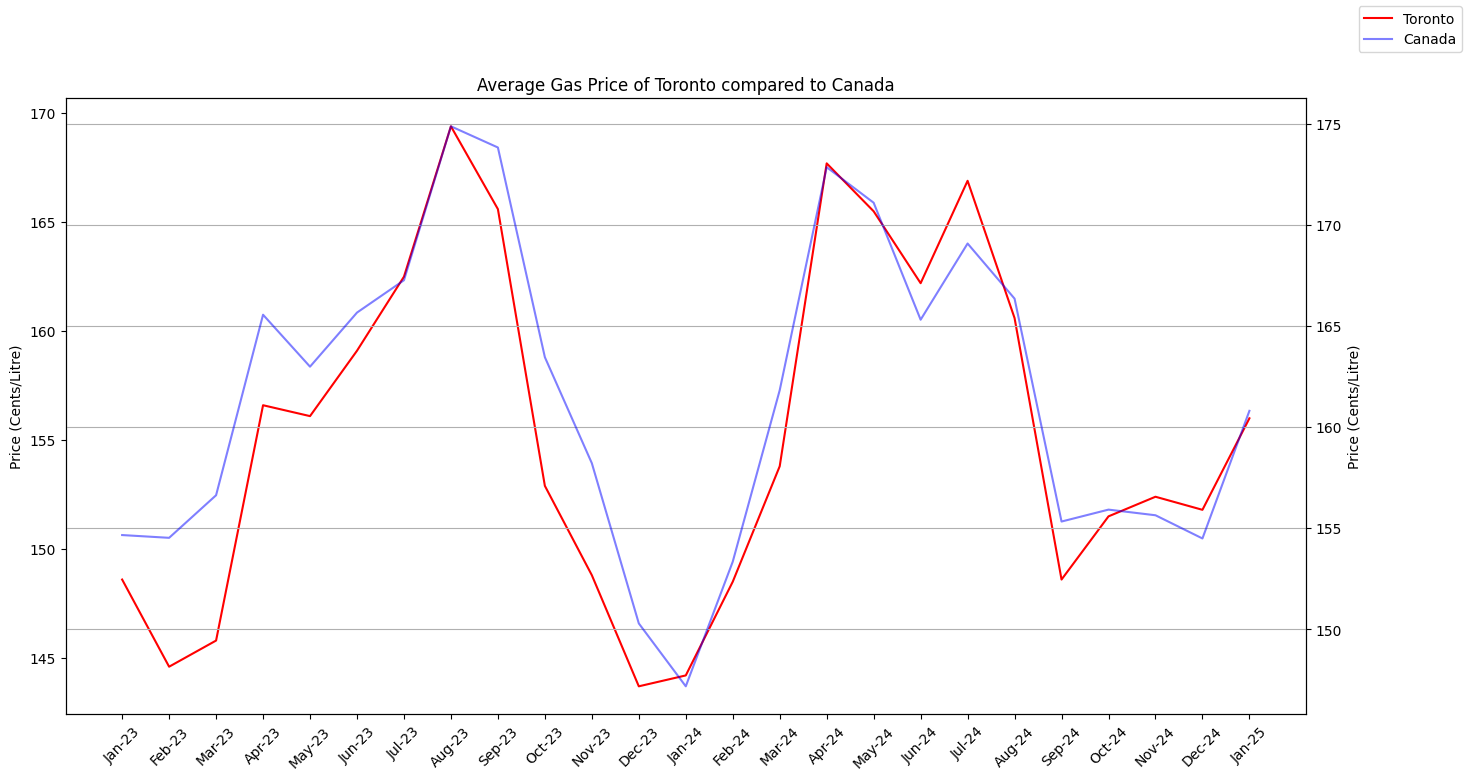

In [7]:
line_graph_1()

## 2. Which three regions have the highest volatility in price and which three regions have the lowest volatility?
Understanding price volatility is crucial for assessing market stability and identifying regions most affected by fluctuations.
### Methodology:
A bar chart is used to display the volatility levels of different regions. Volatility is calculated using the standard deviation of prices, adjusted with the volatility formula to account for the time period. This allows us to rank regions based on how much their gas prices fluctuate.
### Interpretation:
Regions with the highest bars represent areas with the most unstable gas prices, indicating frequent and significant changes.
Regions with the shortest bars experience the least price fluctuations, suggesting greater stability.
By analyzing these trends, we can understand which regions are most vulnerable to price shocks and which ones benefit from more predictable pricing.

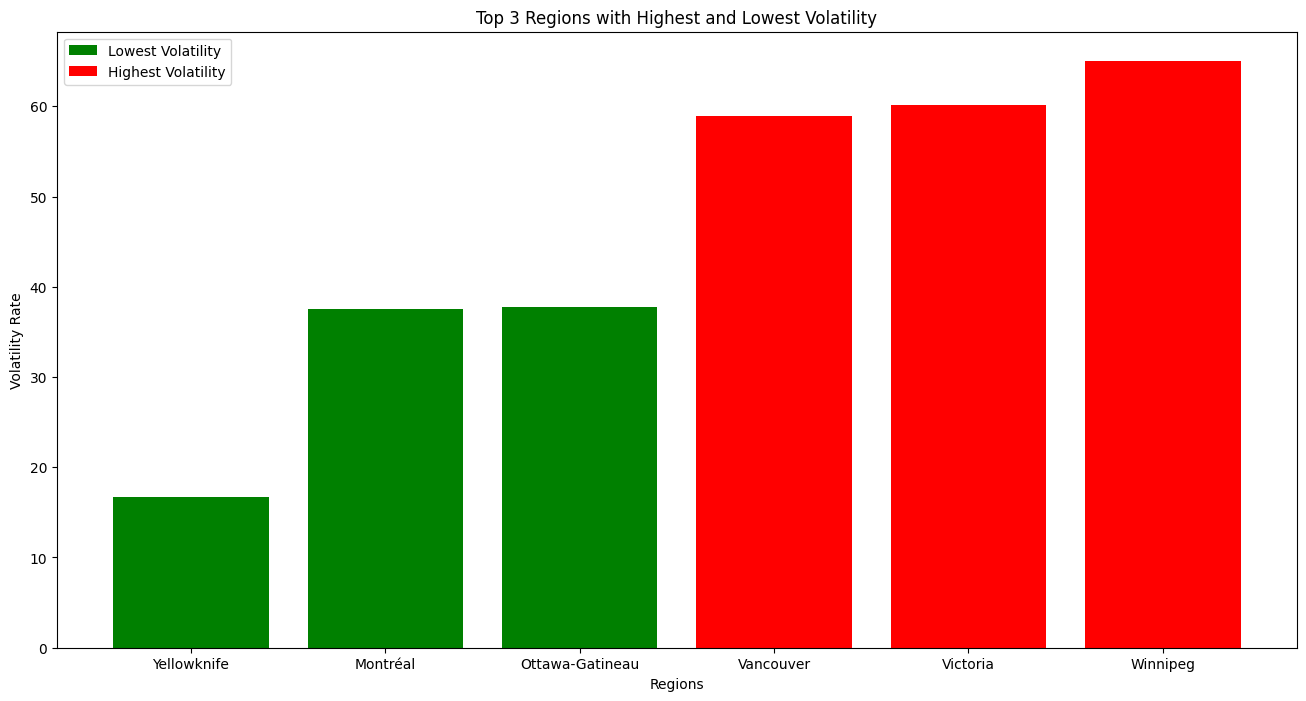

In [8]:
bar_chart()

## 3. How does the price in Toronto change in comparison to the average price in other parts of Ontario (Ottawa and Thunder Bay)?
This analysis provides insight into whether gas prices in Toronto are consistent with other major cities in Ontario or if they follow a different pattern.
### Methodology:
A line graph is used to compare gas price trends in Toronto, Ottawa, and Thunder Bay. The average price of Ottawa and Thunder Bay is calculated and plotted against Toronto’s prices to assess regional differences.
### Interpretation:
If the lines for Toronto and the Ontario average remain close together, it suggests similar pricing trends across the province.
If Toronto’s prices are consistently higher or lower, it highlights regional price discrepancies, which may be influenced by differences in supply chains, transportation costs, or taxation.
This visualization helps us determine whether gas price trends are province-wide or specific to Toronto.

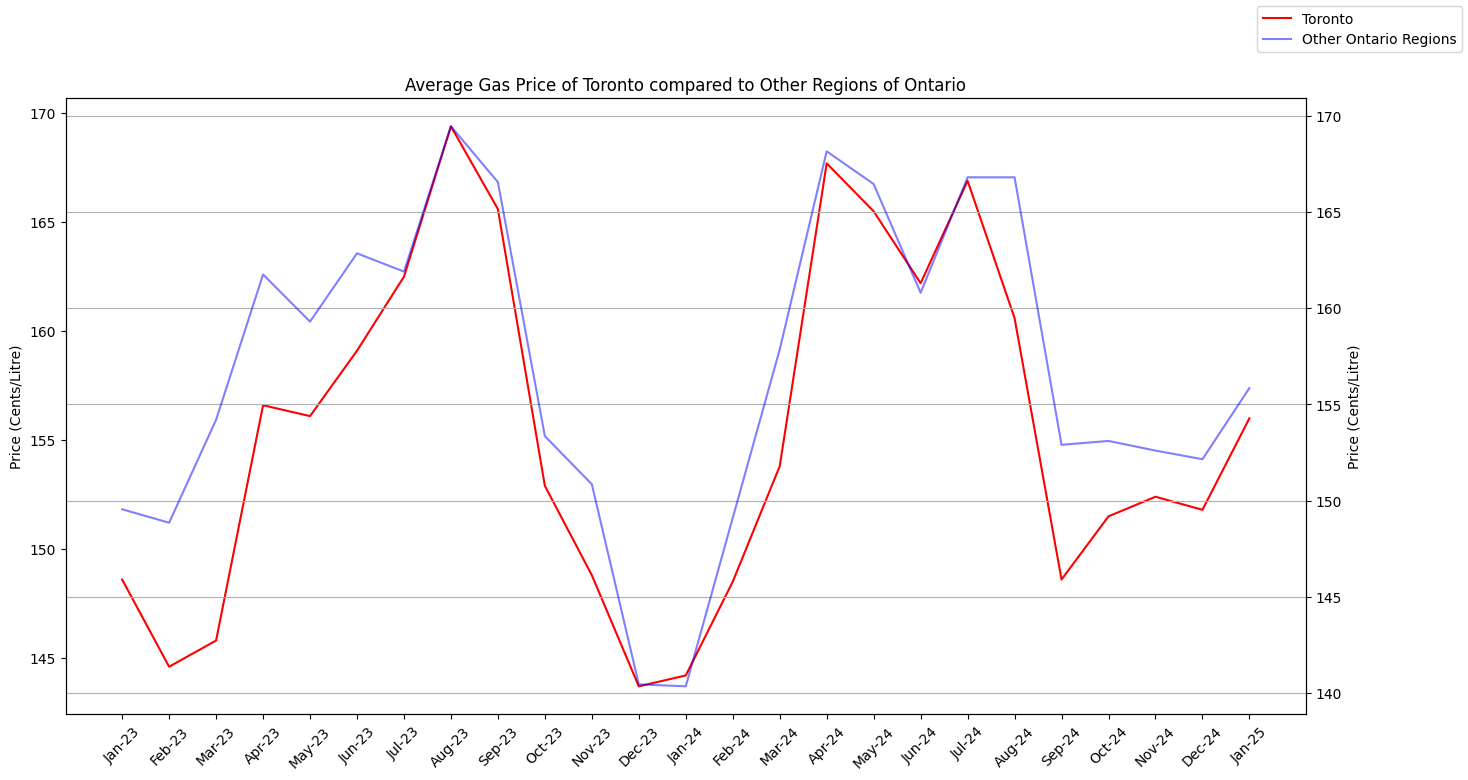

In [9]:
line_graph_2()

### Refrences
1. Statistic Canada. (Feb 18, 2025). Monthly average retail prices for gasoline and fuel oil, by geography. Statistic Canada. Retrieved from: https://www.statcan.gc.ca